### 필요 라이브러리 임포트

In [5]:
import numpy as np
import pandas as pd
import pymysql
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

### DB 접속정보 설정

In [3]:
# db 접속정보 설정
DB_HOST=''
DB_PORT = ''
DB_USER = ''
DB_PASS = ''
DB_NAME=''

In [58]:
# db 접속
conn = pymysql.connect(host = DB_HOST, port = DB_PORT, user = DB_USER, passwd = DB_PASS, db = DB_NAME, cursorclass=pymysql.cursors.DictCursor)
cur = conn.cursor()

sql = """
SELECT * from response_kym
"""
cur.execute(sql)

result = cur.fetchall()
media_df = pd.DataFrame(result)

# db 연결 종료
conn.commit()    
conn.close()

### NaN 값 처리

In [59]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28575 entries, 0 to 28574
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28575 non-null  int64  
 1   Q8      28575 non-null  int64  
 2   Q8_1_1  24910 non-null  float64
 3   Q8_1_2  18797 non-null  float64
 4   Q8_1_3  9350 non-null   float64
 5   Q8_1_4  3307 non-null   float64
 6   Q8_1_5  1322 non-null   float64
 7   Q8_1_6  3 non-null      float64
dtypes: float64(6), int64(2)
memory usage: 1.7 MB


In [60]:
media_df.fillna(0, inplace=True)

In [61]:
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28575 entries, 0 to 28574
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28575 non-null  int64  
 1   Q8      28575 non-null  int64  
 2   Q8_1_1  28575 non-null  float64
 3   Q8_1_2  28575 non-null  float64
 4   Q8_1_3  28575 non-null  float64
 5   Q8_1_4  28575 non-null  float64
 6   Q8_1_5  28575 non-null  float64
 7   Q8_1_6  28575 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.7 MB


In [15]:
media_df.head()

,ID,Q8,Q8_1_1,Q8_1_2,Q8_1_3,Q8_1_4,Q8_1_5,Q8_1_6
0,1,1,1.0,2.0,0.0,0.0,0.0,0.0
1,2,1,1.0,2.0,0.0,0.0,0.0,0.0
2,3,1,3.0,4.0,5.0,0.0,0.0,0.0
3,4,1,2.0,3.0,4.0,0.0,0.0,0.0
4,5,1,1.0,2.0,0.0,0.0,0.0,0.0


### 스마트폰으로 온라인 동영상 서비스 이용 여부 (1:있다 2:없다)

In [16]:
media_df_Q8 = media_df[['Q8']]

In [17]:
print('이용여부 분포:', media_df[['Q8']].value_counts())

이용여부 분포: Q8
1     25340
2      3235
dtype: int64


In [18]:
media_df_Q8[media_df_Q8['Q8']==1].sum()

Q8    25340
dtype: int64

In [19]:
media_df_Q8[media_df_Q8['Q8']==2].sum()/2

Q8    3235.0
dtype: float64

In [20]:
total = media_df_Q8[media_df_Q8['Q8']==1].sum() + media_df_Q8[media_df_Q8['Q8']==2].sum()/2

In [21]:
total

Q8    28575.0
dtype: float64

In [22]:
yes = media_df_Q8[media_df_Q8['Q8']==1].sum() / total * 100

In [23]:
yes = yes.to_frame()

In [24]:
yes

,0
Q8,88.678915


In [25]:
no =  media_df_Q8[media_df_Q8['Q8']==2].sum() / total * 100

In [26]:
no = no.to_frame()

In [27]:
no

,0
Q8,22.64217


In [28]:
total_df = pd.concat([yes,no])
total_df

,0
Q8,88.678915
Q8,22.642170


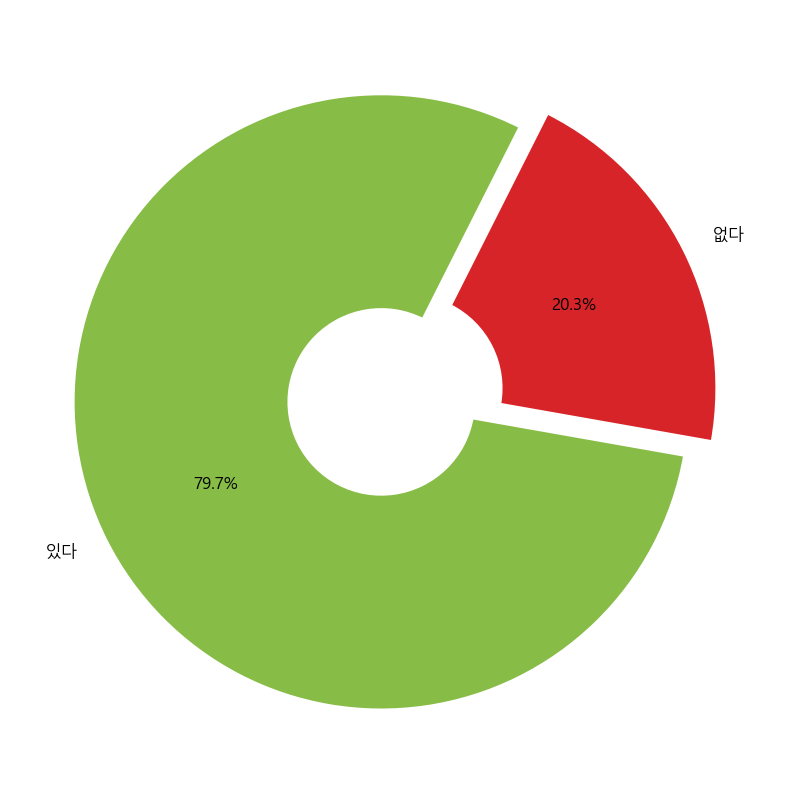

In [29]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = total_df[0].tolist()
labels = ['있다', '없다'] 
explode = [0.05, 0.05]
colors = ['#87BC46','#D72428']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=-10, counterclock=False, 
        explode=explode, colors=colors, wedgeprops=wedgeprops)

plt.savefig('./온라인영상이용여부.png',transparent = True)

plt.show()

- 스마트폰으로 영상을 시청한 비율이 있다가 80%로 대부분을 차지 

### 자주 이용하는 서비스 유형

In [30]:
media_df1=media_df[media_df['Q8']==1]

In [31]:
media_df1

,ID,Q8,Q8_1_1,Q8_1_2,Q8_1_3,Q8_1_4,Q8_1_5,Q8_1_6
0,1,1,1.0,2.0,0.0,0.0,0.0,0.0
1,2,1,1.0,2.0,0.0,0.0,0.0,0.0
2,3,1,3.0,4.0,5.0,0.0,0.0,0.0
3,4,1,2.0,3.0,4.0,0.0,0.0,0.0
4,5,1,1.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28569,28653,1,2.0,0.0,0.0,0.0,0.0,0.0
28570,28654,1,0.0,2.0,0.0,0.0,5.0,0.0
28572,28656,1,1.0,2.0,3.0,5.0,0.0,0.0
28573,28657,1,1.0,2.0,0.0,0.0,0.0,0.0


### 유형 별 개수 확인
- Q8_1_1에 1번 문항만 표시되어 있는게 아니라 1~5번까지 다양하게 표시되어 있음
- 0번은 선택되지 않은 것
- 전체 데이터프레임에서 1번의 총 개수, 2번의 총 개수, ... 이런식으로 구해야함

In [32]:
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_1'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_2'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_3'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_4'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_5'].value_counts())
print('자주 이용하는 서비스 유형:', media_df1['Q8_1_6'].value_counts())

자주 이용하는 서비스 유형: 1.0    10824
2.0     8962
3.0     3879
5.0      713
4.0      532
0.0      430
Name: Q8_1_1, dtype: int64
자주 이용하는 서비스 유형: 2.0    8878
0.0    6543
3.0    6462
4.0    1920
5.0    1529
6.0       8
Name: Q8_1_2, dtype: int64
자주 이용하는 서비스 유형: 0.0    15990
3.0     4955
4.0     2109
5.0     1994
2.0      291
6.0        1
Name: Q8_1_3, dtype: int64
자주 이용하는 서비스 유형: 0.0    22033
4.0     1887
5.0     1419
3.0        1
Name: Q8_1_4, dtype: int64
자주 이용하는 서비스 유형: 0.0    24018
5.0     1321
4.0        1
Name: Q8_1_5, dtype: int64
자주 이용하는 서비스 유형: 0.0    25337
6.0        3
Name: Q8_1_6, dtype: int64


### 문항별 1~6번 개수 구해서 데이터 프레임 생성

In [33]:
Q8_1_1 = pd.DataFrame(media_df1['Q8_1_1'].value_counts()).sort_index()
Q8_1_2 = pd.DataFrame(media_df1['Q8_1_2'].value_counts()).sort_index()
Q8_1_3 = pd.DataFrame(media_df1['Q8_1_3'].value_counts()).sort_index()
Q8_1_4 = pd.DataFrame(media_df1['Q8_1_4'].value_counts()).sort_index()
Q8_1_5 = pd.DataFrame(media_df1['Q8_1_5'].value_counts()).sort_index()
Q8_1_6 = pd.DataFrame(media_df1['Q8_1_6'].value_counts()).sort_index()

In [34]:
Q8_1_1.loc[6.0] = 0

In [35]:
Q8_1_1

,Q8_1_1
0.0,430
1.0,10824
2.0,8962
3.0,3879
4.0,532
5.0,713
6.0,0


In [36]:
Q8_1_2

,Q8_1_2
0.0,6543
2.0,8878
3.0,6462
4.0,1920
5.0,1529
6.0,8


In [37]:
Q8_1_3

,Q8_1_3
0.0,15990
2.0,291
3.0,4955
4.0,2109
5.0,1994
6.0,1


In [38]:
Q8_1_4

,Q8_1_4
0.0,22033
3.0,1
4.0,1887
5.0,1419


In [39]:
Q8_1_5

,Q8_1_5
0.0,24018
4.0,1
5.0,1321


In [40]:
Q8_1_6

,Q8_1_6
0.0,25337
6.0,3


### 데이터 프레임 합치기

In [41]:
total_df_1 = Q8_1_1.join(Q8_1_2, how='left')

In [42]:
total_df_1 = total_df_1.join(Q8_1_3, how='left')
total_df_1 = total_df_1.join(Q8_1_4, how='left')
total_df_1 = total_df_1.join(Q8_1_5, how='left')
total_df_1 = total_df_1.join(Q8_1_6, how='left')

In [43]:
media_sum = total_df_1.sum(axis=1)

In [44]:
media_sum = media_sum.drop(index=0)

In [45]:
media_sum = media_sum.to_frame()

In [46]:
media_sum

,0
1.0,10824.0
2.0,18131.0
3.0,15297.0
4.0,6449.0
5.0,6976.0
6.0,12.0


### 기타가 포함된 그래프

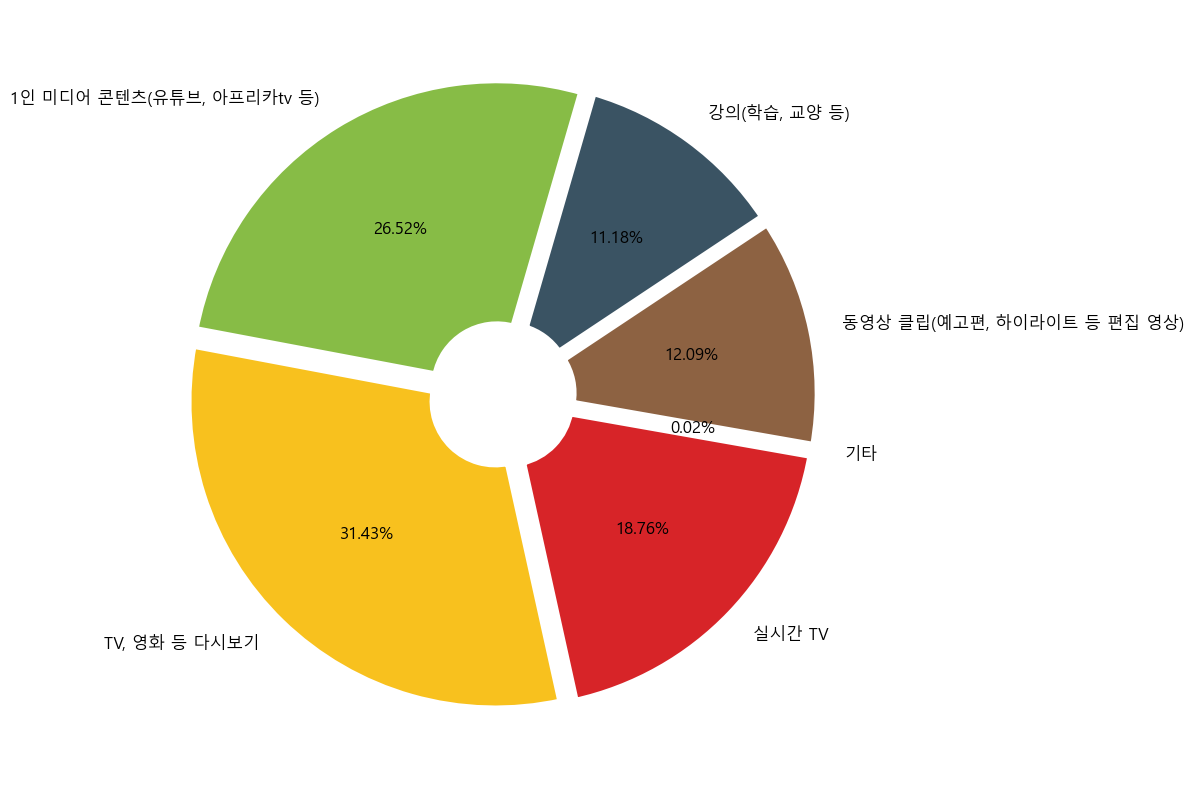

In [47]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = media_sum[0].tolist()
labels = ['실시간 TV', 'TV, 영화 등 다시보기', '1인 미디어 콘텐츠(유튜브, 아프리카tv 등)', '강의(학습, 교양 등)', '동영상 클립(예고편, 하이라이트 등 편집 영상)', '기타'] 
explode = [0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
colors = ['#D72428','#F8C11E','#87BC46','#3A5363','#8D6242'] 
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 6}

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=-10, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)


plt.show()

### 기타가 포함되지 않은 그래프

In [48]:
media_sum2 = media_sum.drop(index=6)

In [49]:
media_sum2

,0
1.0,10824.0
2.0,18131.0
3.0,15297.0
4.0,6449.0
5.0,6976.0


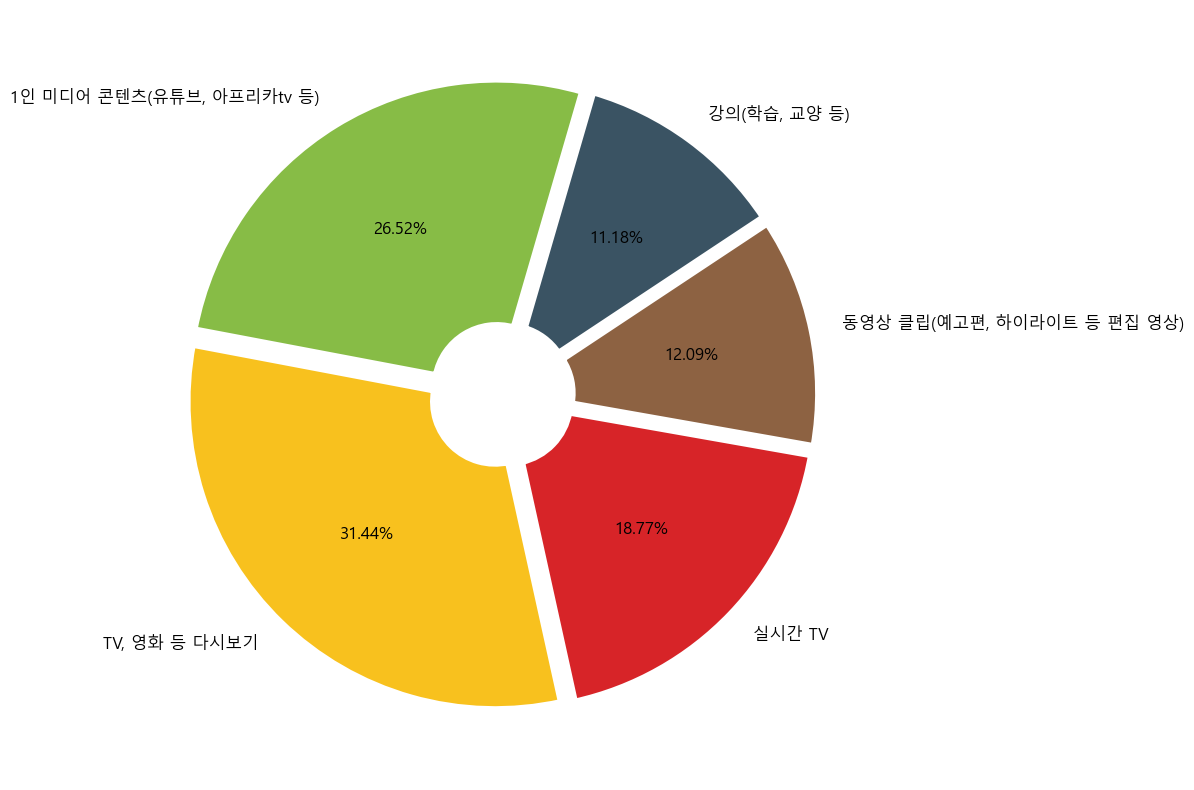

In [50]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = media_sum2[0].tolist()
labels = ['실시간 TV', 'TV, 영화 등 다시보기', '1인 미디어 콘텐츠(유튜브, 아프리카tv 등)', '강의(학습, 교양 등)', '동영상 클립(예고편, 하이라이트 등 편집 영상)'] 
explode = [0.03, 0.03, 0.03, 0.03, 0.03]
colors = ['#D72428','#F8C11E','#87BC46','#3A5363','#8D6242'] 
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=-10, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)


plt.show()

- TV, 영화 등 다시보기 > 1인 미디어 콘텐츠 > 실시간 TV > 동영상 클립 > 강의 순서
- TV, 영화 등 다시보기의 비율이 31.44%로 가장 높음
- 스마트폰 이용시 강의를 목적으로 이용하는 비율이 가장 낮음